In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import yt
##yt.mylog.setLevel()
yt.utilities.logger.disable_stream_logging()

# Bouyancy Frequency Experiment

The MAESTRO equations should correspond to linear gravity waves with a period of

$$\omega^2 = \frac{N^2 k_h^2}{k^2 + 
    \left(
        \frac{2-\gamma}{2\gamma H}
    \right)}
$$
where the second term in the denominator is small in our case.

Experiment summary

    * closed box (periodic x, slipwalls on y)
    * $k_v=1$ (one half period exists in the vertical direction, so as to be unperturbed on y_min and y_max)
    * $k_h$ is increased gradually

## Expected period

1.2e-05


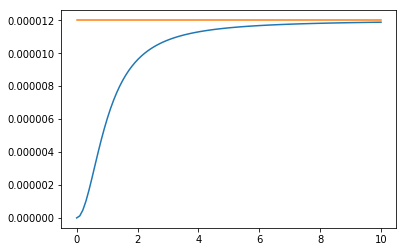

In [2]:
gamma = 5./3. 
g = 3e4
H = 1e9
N2 = (gamma-1.)/gamma * g / H
kv = 1. * np.pi  / H
kh = np.linspace(0,10,100) * np.pi  / H
k2 = kv**2 + kh**2 
w2 = N2 * kh**2 / (k2 )
print(N2)
fig = plt.figure()
ax = plt.axes()
ax.plot(kh*H/np.pi,w2, kh*H/np.pi, N2+0.0*w2)


## Measured vs expected period at center of box


* red is measured
* blue is a wave with $\omega = N$
* green is a wave with  $\omega = \sqrt{2}N$

In [3]:
# DRY - make a quick plotting function

def quickProbePlot(kh_int, dataDir):
    
    ts = yt.load(dataDir+"/plt000????/") # I'd love a way to make this quiet
    pointdata  = []
    time = []
    for ds in ts:
        pointdata.append(ds.point([1e9/2,1e9/2,0.])['rhopert'].value[0])
        time.append(float(ds.current_time))
    
    
    gamma = 5./3. 
    g = 3e4
    H = 1e9
    N2 = (gamma-1.)/gamma * g / H
    kv = 1. * np.pi  / H
    kh = kh_int * np.pi / H
    k2 = kv**2 + kh**2 
    w2 = N2 * kh**2 / (k2 )
    w = np.sqrt(w2)
    
    print('kh_int=',kh_int)
    print('N=',np.sqrt(N2))
    print('w(expected)=',w)

    smoothTime = np.linspace(0,1e4,1e3)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(time, pointdata, '+r', time, pointdata, 'r',
        smoothTime, pointdata[0] * np.cos(-w * smoothTime), 'b',
        smoothTime, pointdata[0] * np.cos(-w*np.sqrt(2) * smoothTime), 'g')

    plt.show()
    
    return

### plots for $k_h$ = 2, 4, 8, 16

basically - see the analytical formula is a good fit and that it is asymptoting towards the expected

kh_int= 2
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


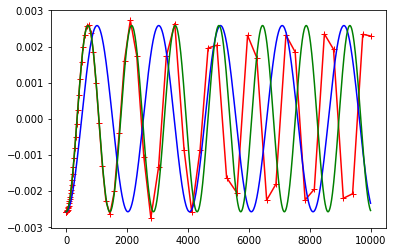

In [4]:
dataDir = "../oldruns/fri14/bouyancyFreqExperiment/kh2/"
quickProbePlot(2,dataDir)

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0033606722016672236


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


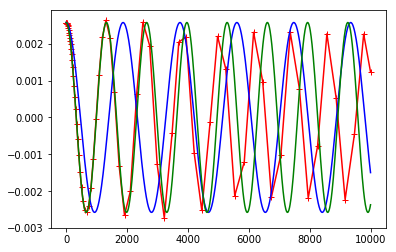

In [5]:
dataDir = "../oldruns/fri14/bouyancyFreqExperiment/kh4/"
quickProbePlot(4,dataDir)

kh_int= 8
N= 0.0034641016151377548
w(expected)= 0.0034373513953892777


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


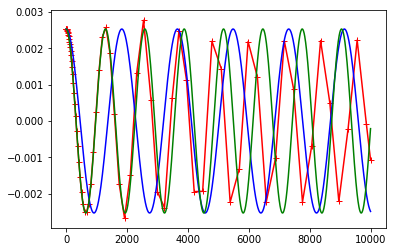

In [6]:
dataDir = "../oldruns/fri14/bouyancyFreqExperiment/kh8/"
quickProbePlot(8,dataDir)

kh_int= 16
N= 0.0034641016151377548
w(expected)= 0.003457355549114975


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


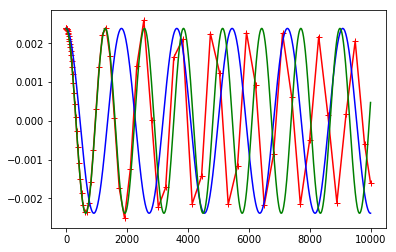

In [7]:
dataDir = "../oldruns/fri14/bouyancyFreqExperiment/kh16/"
quickProbePlot(16,dataDir)

## A quick plot of each of the perturbations at $t=0$

In [8]:
# DRY
def quickIcPlot(dataDir):
    ds = yt.load(dataDir+"/plt0000000/")
    var = "rhopert";
    plot = yt.SlicePlot(ds, "z", var);
    plot.set_log(var, False);
    plot.show()


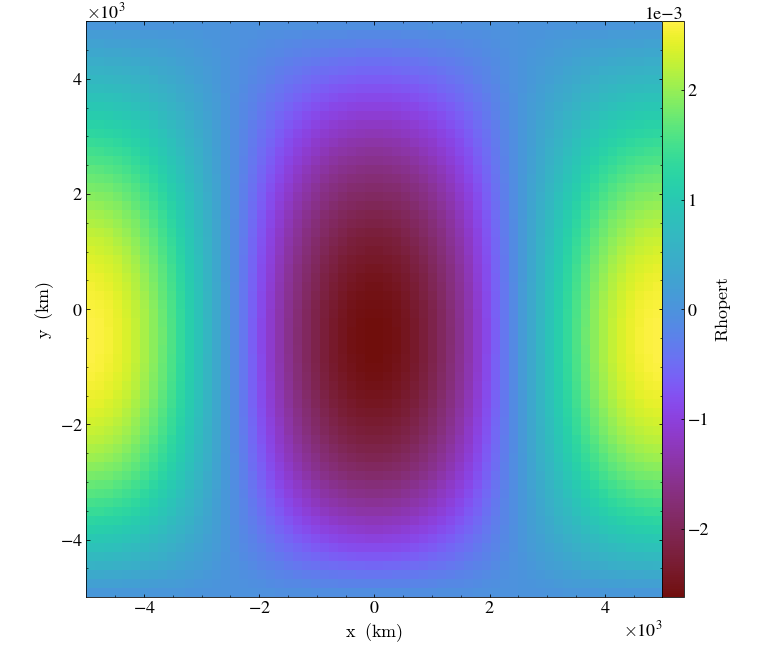

In [9]:
quickIcPlot(dataDir = "../oldruns/fri14/bouyancyFreqExperiment/kh2/")


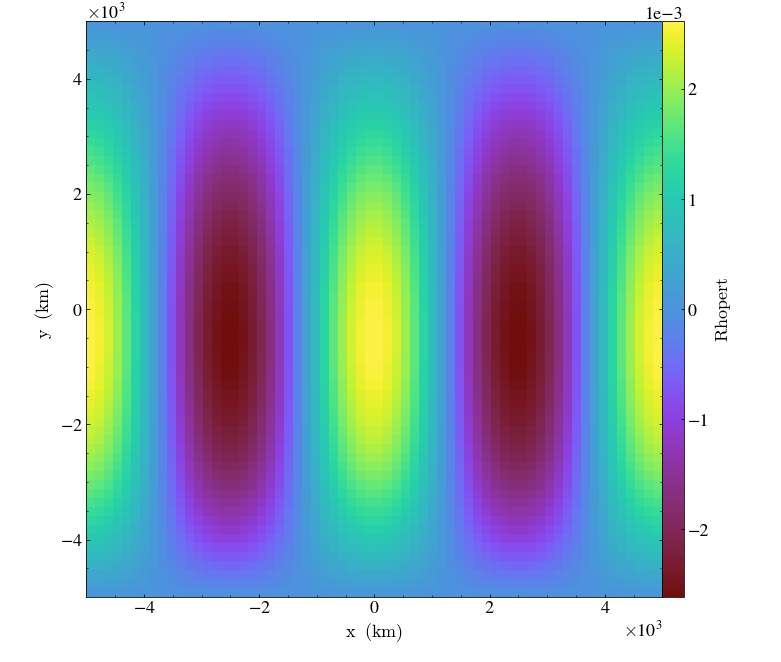

In [10]:
dataDir = "../oldruns/fri14/bouyancyFreqExperiment/kh4/"
quickIcPlot(dataDir)


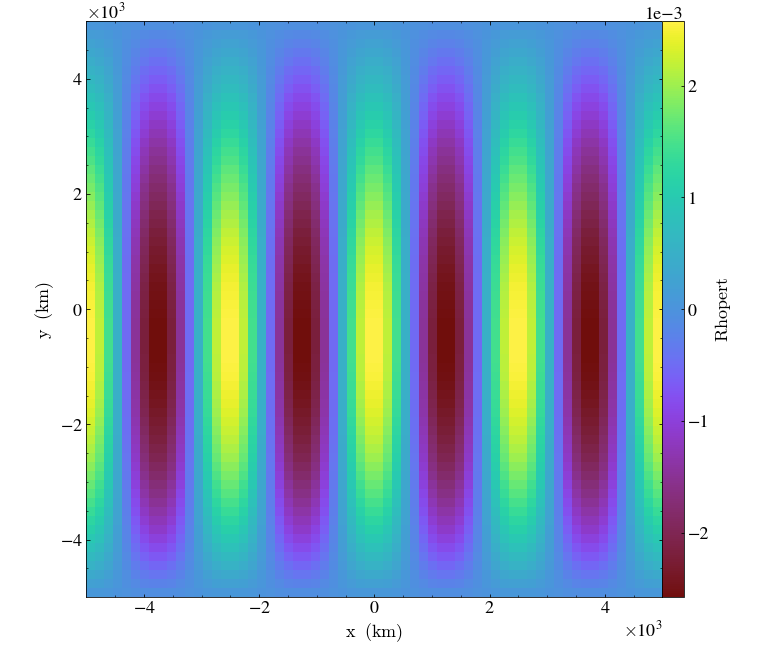

In [11]:
dataDir = "../oldruns/fri14/bouyancyFreqExperiment/kh8/"
quickIcPlot(dataDir)


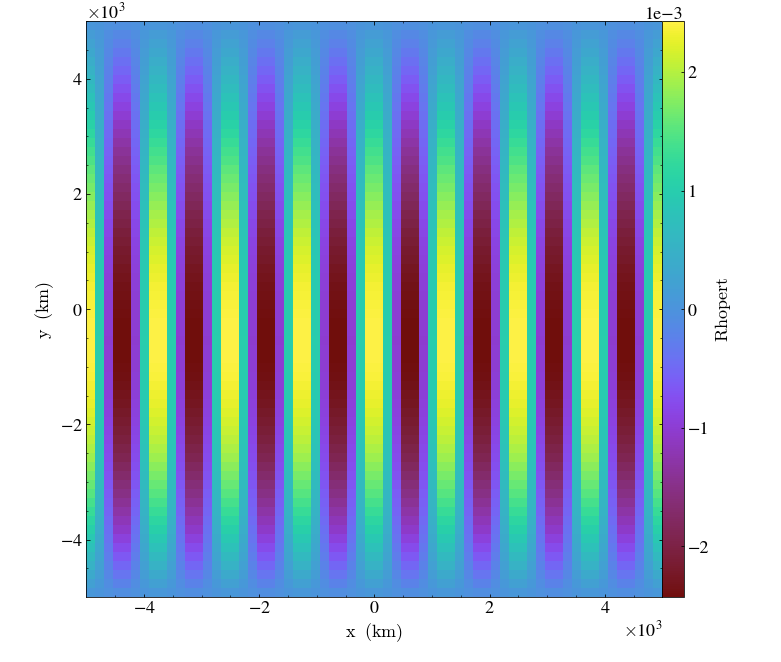

In [12]:
dataDir = "../oldruns/fri14/bouyancyFreqExperiment/kh16/"
quickIcPlot(dataDir)